# Activity 3: K-means clustering with Pew Data

In this activity we take the Pew Data set for Gaming,Jobs and Broadband, clean the data, select five columns of interest and perform K-Means Clustering, for k=3 and 5, and analyze the results. The results are supported with a plot of the overlapping clusters to give a picture of the clusters created.

In [1]:
#Load the required libraries

library("FNN")
library(dplyr)
library("cluster")

Warning message:
"package 'FNN' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [119]:
# Load the data from the CSV file

data <- read.csv("June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv")

In [120]:
names(data)

[1] "ï..psraid"  "sample"     "int_date"   "lang"       "usr"       
  [6] "cregion"    "state"      "form"       "sex"        "q1"        
 [11] "q3"         "eminuse"    "intmob"     "intfreq"    "home4nw"   
 [16] "bbhome1"    "bbhome2"    "bbhome3a"   "bbhome3b"   "bbhome3c"  
 [21] "bbhome3d"   "bbhome3e"   "device1a"   "smart1"     "q4"        
 [26] "bbsmart1"   "bbsmart2"   "bbsmart3a"  "bbsmart3b"  "bbsmart3c" 
 [31] "bbsmart3d"  "bbsmart3e"  "bbsmart3f"  "bbsmart4"   "cable1"    
 [36] "cable2"     "cable3a"    "cable3b"    "cable3c"    "act19"     
 [41] "act87a"     "act87b"     "act137"     "q5a"        "q5b"       
 [46] "q5c"        "q5d"        "q5e"        "q5f"        "date1a"    
 [51] "date2a"     "date3a"     "date3b"     "date4a"     "date4b"    
 [56] "date4c"     "date4d"     "date4e"     "date4f"     "game1"     
 [61] "game2a"     "game2b"     "game2c"     "game2d"     "game2e"    
 [66] "game2f"     "game3a"     "game3b"     "game4"      "emplnw"    
 [71] "emptype1"   "emptype2"   "emptype3"   "stud"       "job1a"     
 [76] "job1b"      "job1c"      "job1d"      "job1e"      "job1f"     
 [81] "job2"       "job3a"      "job3b"      "job3c"      "job3d"     
 [86] "job3e"      "job3f"      "job3g"      "job3h"      "job4"      
 [91] "smjob1"     "smjob2a"    "smjob2b"    "smjob2c"    "smjob2d"   
 [96] "smjob2e"    "smjob3"     "smjob4a"    "smjob4b"    "smjob4c"   
[101] "smjob4d"    "smjob4e"    "snsjob1a"   "snsjob1b"   "snsjob1c"  
[106] "snsjob2a"   "snsjob2b"   "job5a"      "job5b"      "job5c"     
[111] "job5d"      "auto1a"     "auto1b"     "auto1c"     "auto1d"    
[116] "auto1e"     "auto2"      "auto3"      "age"        "marital"   
[121] "hh1"        "par"        "kidage1"    "kidage2"    "kidage3"   
[126] "educ2"      "edinst"     "disa"       "party"      "partyln"   
[131] "ideo"       "hisp"       "birth_hisp" "race"       "inc"       
[136] "ql1a"       "qc1"        "zipcode"    "weight"     "standwt"

Gather columns of interest, namely; Age, Sex, Education Level, Smartphone Ownership and Political affiliation

In [140]:
datakmeans <- select(data, age,sex,educ2,smart1,party )

We now omit the NA values from the data set and filter values which would give us some meaningful insights through clustering

In [141]:
datakmeans <- na.omit(datakmeans)

In [142]:
datakmeans <- filter(datakmeans,(smart1==1 | smart1==2))
datakmeans <- filter(datakmeans,(educ2!=98) & (educ2!=99))
# datakmeans <- filter(datakmeans, (emplnw==1 | emplnw==2 | emplnw==3 | emplnw==4 | emplnw==5))
datakmeans <- filter(datakmeans,(party==1|party==2|party==3))
nrow(datakmeans)

datakmeans <- arrange(datakmeans,age,sex,educ2,smart1,party)

# datakmeans$age <- cut(datakmeans$age, 
#                        breaks = c(18, 30, 50, 65, Inf), 
#                        labels = c("1", "2", "3", "4"), 
#                        right = FALSE)

[1] 1555

In [134]:
# datakmeans$educ2[datakmeans$educ2 == "1"|datakmeans$educ2 == "2"] <- as.numeric("1")
# # test1$educ2[test1$educ2 == "1"|test1$educ2 == "2"] <- "LT High School"
# datakmeans$educ2[datakmeans$educ2 == "3"] <- as.numeric("2")
# datakmeans$educ2[datakmeans$educ2 == "4"|datakmeans$educ2 == "5"] <- as.numeric("3")
# datakmeans$educ2[datakmeans$educ2 == "6"|datakmeans$educ2 == "7"] <- as.numeric("4")
# datakmeans$educ2[datakmeans$educ2 == "8"] <- as.numeric("5")

In [143]:
# Sort the data based on the columns 
datakmeans <- arrange(datakmeans,age,sex,educ2,smart1,party)

head(datakmeans)

age,sex,educ2,smart1,party
18,1,1,1,3
18,1,2,1,1
18,1,2,2,1
18,1,3,1,1
18,1,3,1,2
18,1,3,1,2


We now perform K Means clustering on the data with K=3 and K=5 and analyze the results

K-means clustering with 3 clusters of sizes 610, 453, 492

Cluster means:
       age      sex    educ2   smart1    party
1 52.83443 1.493443 5.349180 1.216393 2.090164
2 72.67108 1.558499 5.128035 1.490066 2.024283
3 28.51829 1.428862 4.796748 1.077236 2.292683

Clustering vector:
   [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [186] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [223] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [260] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [297] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

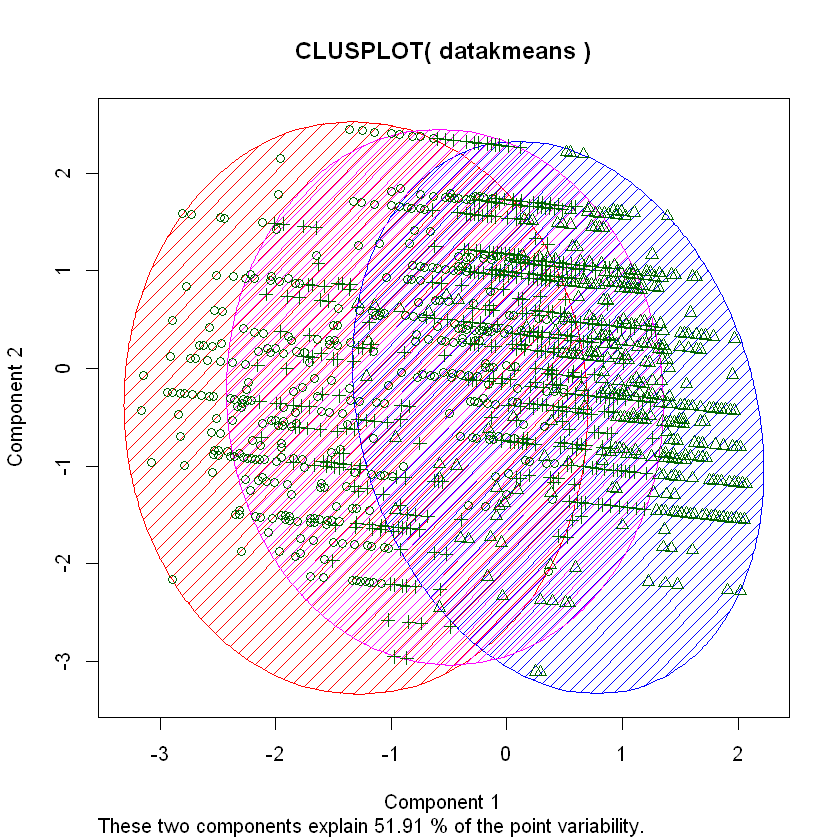

In [145]:
kmeans(datakmeans,3)
clusplot(datakmeans,kmeans(datakmeans,3)$cluster,color=TRUE,shade=TRUE)




The 3 clusters lead us to the following observations:
1. Cluster 1 has a mean age of ~53, signifying that a majority of the group is middle-aged, a mean average education of more than 2 years college degree (and higher), a major support for the democratic party, and relatively lesser ownership of smartphones compared to Cluster 3 which is a younger aged-group.

2. Cluster 2 has the highest mean age for all the 3 clusters (~72.7) with a larger number not owning smartphones, having a mean 
education level of 2 years college degree(or higher), and lesser support for Democrats compared to other clusters.

3. Cluster 3 has a mean age of 28.5, signifying a  younger age group, with most of them admitting to owning smartphones, having a mean education level less than a 2 year college degree, and support for democrats as well as independent candidates.

K-means clustering with 5 clusters of sizes 424, 338, 302, 116, 375

Cluster means:
       age      sex    educ2   smart1    party
1 54.99528 1.490566 5.275943 1.261792 2.108491
2 24.93195 1.420118 4.597633 1.071006 2.286982
3 40.26159 1.493377 5.344371 1.072848 2.178808
4 85.11207 1.568966 4.818966 1.689655 1.922414
5 67.74133 1.533333 5.285333 1.413333 2.058667

Clustering vector:
   [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [223] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [260] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

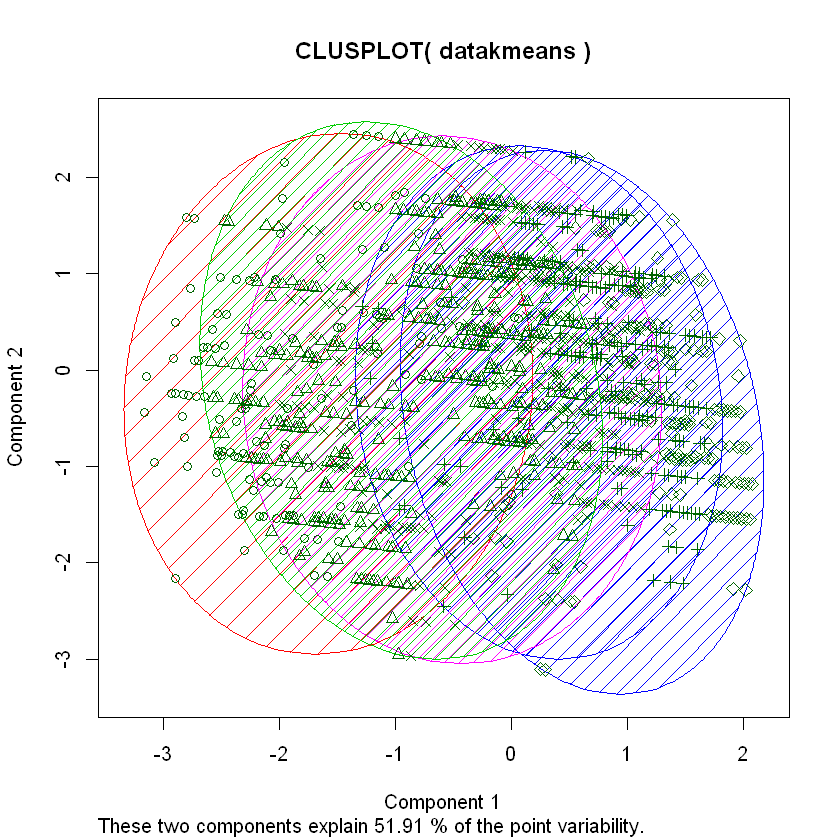

In [144]:
# clusplot(data2,kmeans(data2,3)$cluster)
kmeans(datakmeans,5)
clusplot(datakmeans,kmeans(datakmeans,5)$cluster,color=TRUE,shade=TRUE)


The results of the various clusters lead us to the following observations:
1. Cluster 1 comprises of individuals who are relatively older (mean age ~55), and majority of them have, at least a 
2 years associate degree, many of them owning a smartphone (but relatively less than the clusters having a lesser mean age), 
and most of them support the Democratic party or Independents.

2. Cluster 2 has a mean age of ~25, and hence generally comprises of a younger generation, and most of them tend own a smartphone,have mean education of a less than 2 years college degree, and support the democrats.

3. Cluster 3 is more of a middle-aged cluster, again the mean education lies somewhere around having less than a 2 years college degree,MOST of them owning smartphones, and supporting democrats.

4. Cluster 4 has the highest mean age for all the data given, mean education again hovering around less than 2 year college degree and the mean for smartphone ownership suggests most of them do NOT own smartphones (1.69 is very close to 2 which corresponds to not owning smartphones) and a relatively large number of them support republicans(compared to other clusters).

The between_SS/total_SS ratio is ~93%, suggesting that this is a better fit than k=3, as is shown through the cluster plot